In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne  # For reading .rec (if it's in EDF format)
from openpyxl import load_workbook  # For .xlsx processing

# Define Main Folder Path
main_folder = "../data/ISRUC_S3/RawData/RawData"  # CHANGE THIS TO YOUR ACTUAL PATH

# Loop through each subfolder
for subfolder in sorted(os.listdir(main_folder)):
    subfolder_path = os.path.join(main_folder, subfolder)

    if os.path.isdir(subfolder_path):  # Ensure it's a directory
        print(f"\n📂 Processing Folder: {subfolder}\n" + "="*50)

        # Process .rec Files
        rec_files = [f for f in os.listdir(subfolder_path) if f.endswith(".rec")]
        for rec_file in rec_files:
            rec_path = os.path.join(subfolder_path, rec_file)
            print(f"🔹 Loading .rec file: {rec_file}")

            try:
                # Load .rec file (assuming it's EDF format)
                raw = mne.io.read_raw_edf(rec_path, preload=True)

                # Extract signals
                channels = raw.ch_names
                data, times = raw[:]

                # Plot raw signals (first 3 channels)
                plt.figure(figsize=(12, 6))
                for i in range(min(3, len(channels))):
                    plt.plot(times, data[i], label=f"Raw: {channels[i]}")
                plt.xlabel("Time (s)")
                plt.ylabel("Amplitude")
                plt.title(f"Raw Signal from {rec_file}")
                plt.legend()
                plt.show()

            except Exception as e:
                print(f"❌ Error processing {rec_file}: {e}")

        # Process .txt Files
        txt_files = [f for f in os.listdir(subfolder_path) if f.endswith(".txt")]
        for txt_file in txt_files:
            txt_path = os.path.join(subfolder_path, txt_file)
            print(f"📄 Loading .txt file: {txt_file}")

            try:
                # Load text file as a DataFrame
                df_txt = pd.read_csv(txt_path, delimiter="\t", header=None)  # Change delimiter if needed
                print(df_txt.head())  # Print first few rows

            except Exception as e:
                print(f"❌ Error processing {txt_file}: {e}")

        # Process .xlsx Files
        xlsx_files = [f for f in os.listdir(subfolder_path) if f.endswith(".xlsx")]
        for xlsx_file in xlsx_files:
            xlsx_path = os.path.join(subfolder_path, xlsx_file)
            print(f"📊 Loading .xlsx file: {xlsx_file}")

            try:
                # Load Excel file
                df_xlsx = pd.read_excel(xlsx_path, engine='openpyxl')
                print(df_xlsx.head())  # Print first few rows

            except Exception as e:
                print(f"❌ Error processing {xlsx_file}: {e}")

print("\n✅ All files processed successfully!")



📂 Processing Folder: 1
🔹 Loading .rec file: 1.rec
❌ Error processing 1.rec: Only EDF files are supported, got rec.
📄 Loading .txt file: 1_1.txt
   0
0  0
1  0
2  0
3  0
4  0
📄 Loading .txt file: 1_2.txt
   0
0  0
1  0
2  0
3  0
4  0
📊 Loading .xlsx file: 1_1.xlsx
   Epoch Stage  SpO2        HR Events BPOS  Txln  TxEx               Technote  \
0      1     W     0  98 L Out    NaN    B     0     0  23:19:53 - LIGHTS OUT   
1      2     W     0        82    NaN    B     0     0                    NaN   
2      3     W     0        89    NaN    B     0     0                    NaN   
3      4     W     0        95    NaN    B     0     0                    NaN   
4      5     W     0       100    NaN    R     0     0                    NaN   

   Unnamed: 9  Unnamed: 10  Unnamed: 11       ID:     097/09  
0         NaN          NaN          NaN     DATE:  28/3/2009  
1         NaN          NaN          NaN  HEIGHT:          in  
2         NaN          NaN          NaN       NaN         c

Total Data Points: 38996030
First 10 values: [1.3563177e-19 1.3563156e-19 1.3563178e-19 1.3563156e-19 1.3563156e-19
 1.3563156e-19 1.3563156e-19 1.3563156e-19 1.3563156e-19 1.3563156e-19]


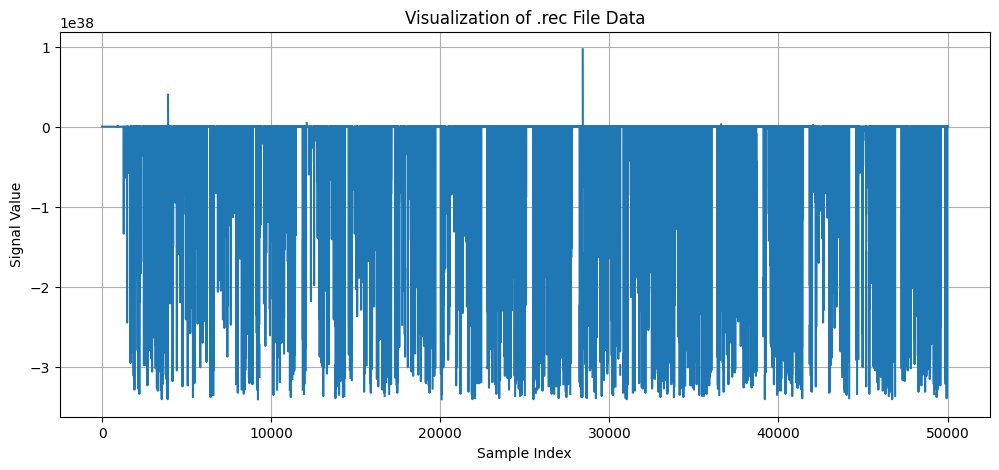

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Path to your .rec file (Change this path accordingly)
rec_file = "../data/ISRUC_S3/RawData/RawData/1/1.rec"

# Try reading the raw binary data
with open(rec_file, "rb") as f:
    raw_data = np.fromfile(f, dtype=np.float32)  # Try np.int16 if data looks incorrect

# Print some information
print(f"Total Data Points: {len(raw_data)}")
print(f"First 10 values: {raw_data[:10]}")

# Plot the signal
plt.figure(figsize=(12, 5))
plt.plot(raw_data[:50000])  # Adjust 5000 based on data size
plt.title("Visualization of .rec File Data")
plt.xlabel("Sample Index")
plt.ylabel("Signal Value")
plt.grid()
plt.show()


Total Data Points: 38464655
First 10 values: [1.3563177e-19 1.3563156e-19 1.3563180e-19 1.3563156e-19 1.3563156e-19
 1.3563156e-19 1.3563156e-19 1.3563156e-19 1.3563156e-19 1.3563156e-19]


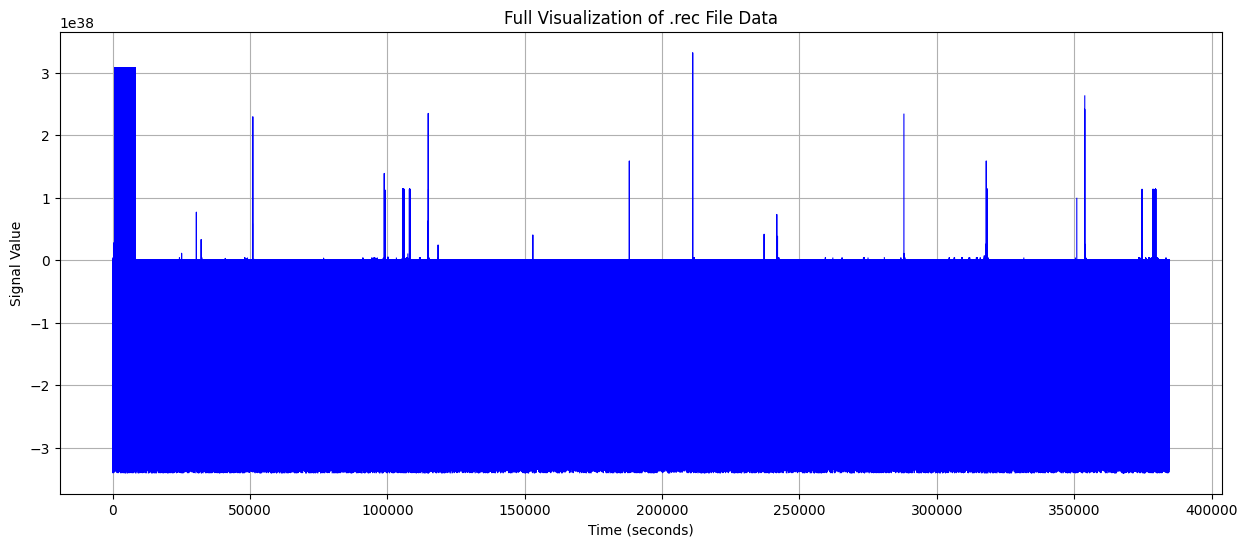

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# 🔧 Fix for OverflowError
mpl.rcParams['agg.path.chunksize'] = 10000  # Set chunk size to handle large data

# Path to your .rec file (Change this to the correct path)
rec_file = "../data/ISRUC_S3/RawData/RawData/2/2.rec"

# Read the binary data
with open(rec_file, "rb") as f:
    raw_data = np.fromfile(f, dtype=np.float32)  # Try np.int16 if needed

# Print some basic info
print(f"Total Data Points: {len(raw_data)}")
print(f"First 10 values: {raw_data[:10]}")

# Create a time axis (Modify sampling rate if known)
sampling_rate = 100  # Change this to your actual sampling rate
time_axis = np.arange(len(raw_data)) / sampling_rate

# 📊 Efficient Visualization: Plot in Chunks
plt.figure(figsize=(15, 6))
plt.plot(time_axis[::10], raw_data[::10], color="blue", linewidth=0.8)  # Downsampling by 10 for speed
plt.title("Full Visualization of .rec File Data")
plt.xlabel("Time (seconds)")
plt.ylabel("Signal Value")
plt.grid()
plt.show()


C:\Users\Victus\AppData\Local\Temp\ipykernel_17996\230962486.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap("OrRd", num_files)  # "OrRd" = Orange to Red


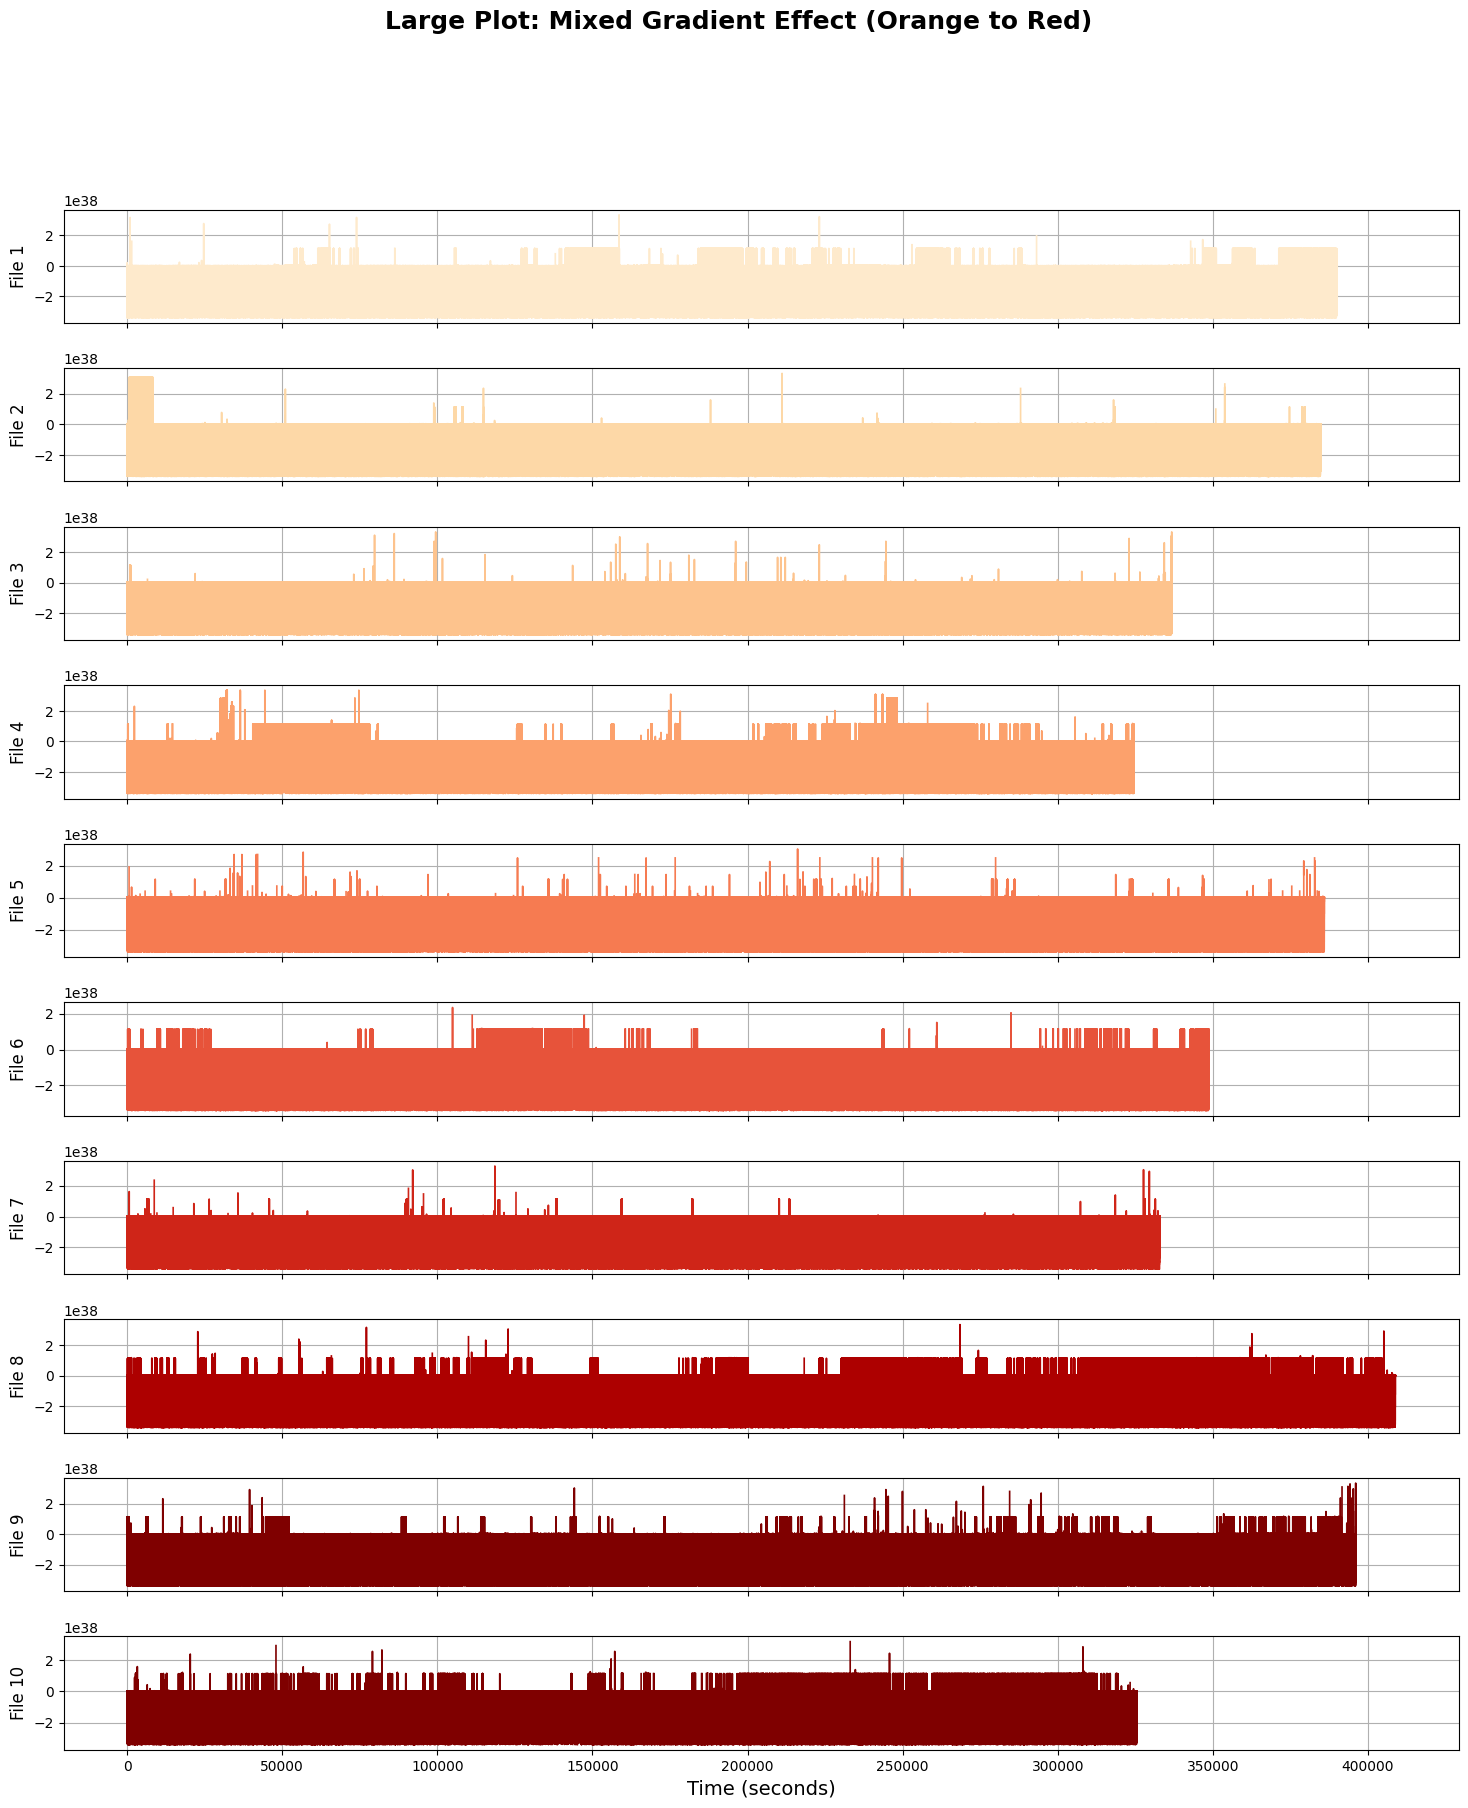

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm

# 🔧 Fix for OverflowError
mpl.rcParams['agg.path.chunksize'] = 10000  # Set chunk size to handle large data

# Base path for the .rec files
base_path = "../data/ISRUC_S3/RawData/RawData/"
num_files = 10  # Total number of .rec files

# Sampling rate (modify if needed)
sampling_rate = 100  

# Create colormap transitioning from orange to red
color_map = cm.get_cmap("OrRd", num_files)  # "OrRd" = Orange to Red

# Create subplots (10 rows, 1 column) with a **bigger figure size**
fig, axes = plt.subplots(num_files, 1, figsize=(18, 20), sharex=True)  # Increased figure size

for i in range(1, num_files + 1):  # Loop through files 1 to 10
    rec_file = f"{base_path}{i}/{i}.rec"
    
    # Read binary data
    try:
        with open(rec_file, "rb") as f:
            raw_data = np.fromfile(f, dtype=np.float32)  # Try np.int16 if needed
    except Exception as e:
        print(f"Error reading {rec_file}: {e}")
        continue  # Skip to the next file if there's an error

    # Create time axis
    time_axis = np.arange(len(raw_data)) / sampling_rate

    # Get color from the colormap (smooth transition between orange & red)
    color = color_map(i / num_files)

    # Plot in the corresponding subplot
    ax = axes[i - 1]  # Select the subplot
    ax.plot(time_axis[::10], raw_data[::10], color=color, linewidth=1.2)  # Smooth gradient effect
    ax.set_ylabel(f"File {i}", fontsize=12)  # Label each subplot

    # Grid for better visibility
    ax.grid()

# Common labels and title
axes[-1].set_xlabel("Time (seconds)", fontsize=14)  # X-axis label only on the last subplot
fig.suptitle("Large Plot: Mixed Gradient Effect (Orange to Red)", fontsize=18, fontweight='bold')

# Adjust subplot spacing
plt.subplots_adjust(hspace=0.4)  # Increase spacing between subplots

plt.show()


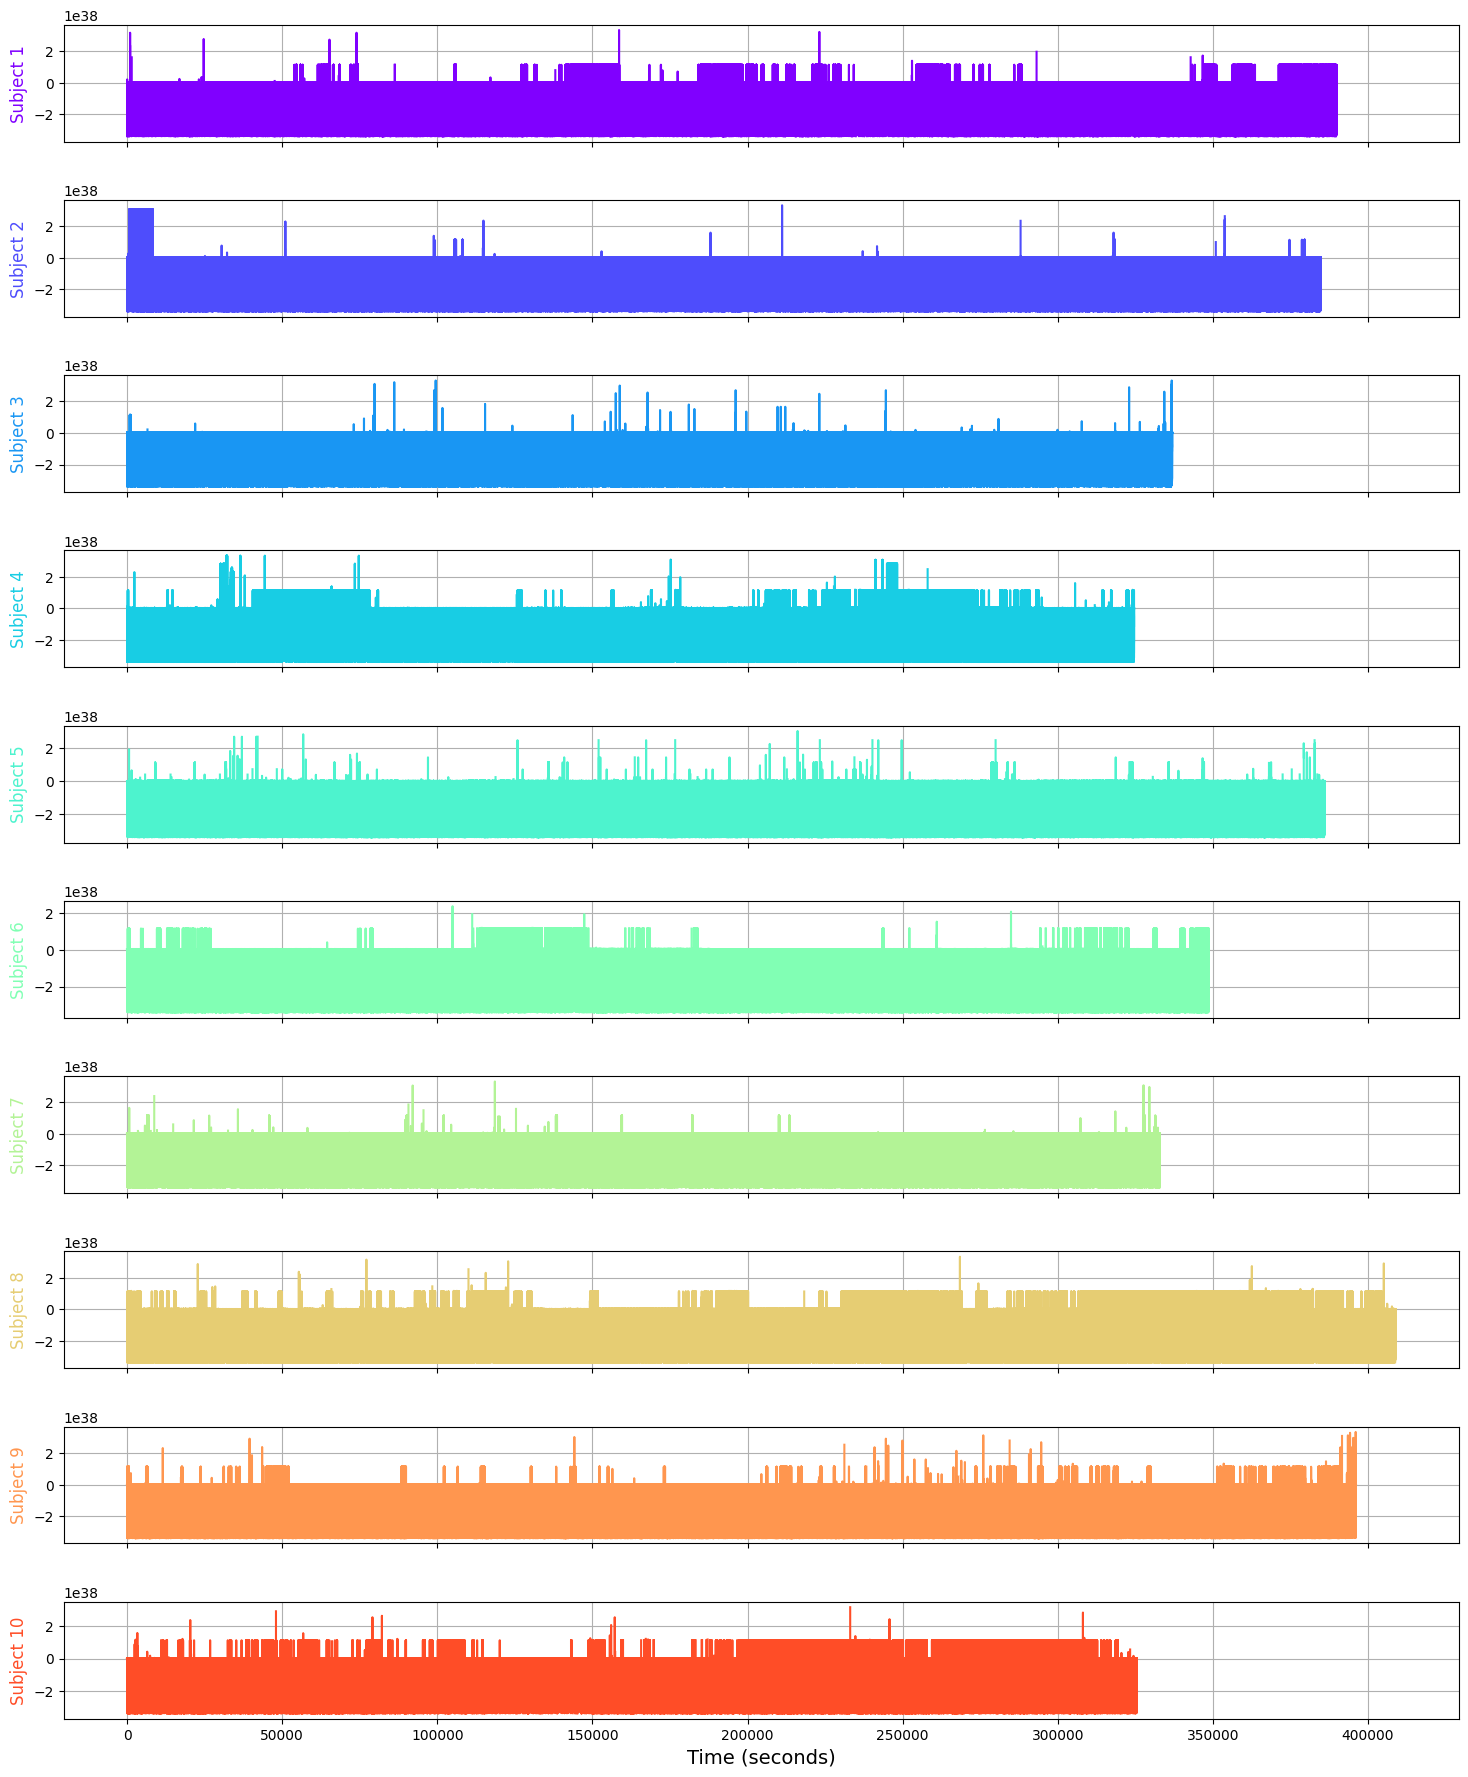

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm

# 🔧 Fix for OverflowError
mpl.rcParams['agg.path.chunksize'] = 10000  # Set chunk size to handle large data

# Base path for the .rec files
base_path = "../data/ISRUC_S3/RawData/RawData/"
num_files = 10  # Total number of .rec files

# Sampling rate (modify if needed)
sampling_rate = 100  

# 🎨 Use the "rainbow" colormap for vibrant colors
colors = [cm.rainbow(i / num_files) for i in range(num_files)]

# Create subplots (10 rows, 1 column) with a **bigger figure size**
fig, axes = plt.subplots(num_files, 1, figsize=(18, 22), sharex=True)  # Increased figure size

for i in range(1, num_files + 1):  # Loop through files 1 to 10
    rec_file = f"{base_path}{i}/{i}.rec"
    
    # Read binary data
    try:
        with open(rec_file, "rb") as f:
            raw_data = np.fromfile(f, dtype=np.float32)  # Try np.int16 if needed
    except Exception as e:
        print(f"Error reading {rec_file}: {e}")
        continue  # Skip to the next file if there's an error

    # Create time axis
    time_axis = np.arange(len(raw_data)) / sampling_rate

    # Get color from the "rainbow" colormap
    color = colors[i - 1]

    # Plot in the corresponding subplot
    ax = axes[i - 1]  # Select the subplot
    ax.plot(time_axis[::10], raw_data[::10], color=color, linewidth=1.5)  # Rainbow effect
    ax.set_ylabel(f"Subject {i}", fontsize=12, color=color)  # Label each subplot in the same color

    # Grid for better visibility
    ax.grid()

# Common labels and title
axes[-1].set_xlabel("Time (seconds)", fontsize=14)  # X-axis label only on the last subplot
# fig.suptitle("🌈 Rainbow-Themed Signal Visualization", fontsize=20, fontweight='bold', color="darkblue")

# Adjust subplot spacing
plt.subplots_adjust(hspace=0.5)  # Increase spacing between subplots

plt.show()


c:\Users\Victus\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\signal\_signaltools.py:2177: RuntimeWarning: invalid value encountered in cast
  return _sigtools._linear_filter(b, a, x, axis, zi)


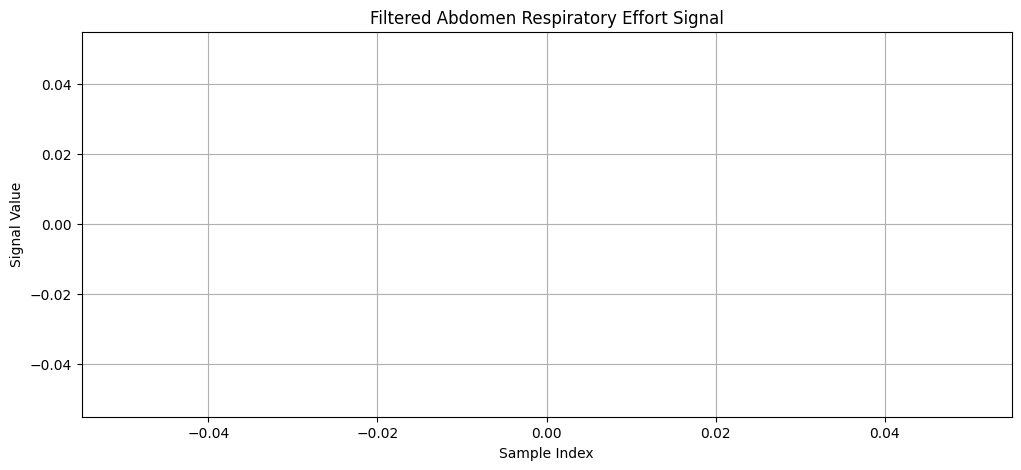

In [4]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Function to load .rec file
def load_rec_file(file_path):
    with open(file_path, "rb") as f:
        raw_data = np.fromfile(f, dtype=np.float32)  # Try np.int16 if needed
    return raw_data

# Function to apply a Butterworth low-pass filter
def butter_lowpass_filter(data, cutoff=0.5, fs=100, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = signal.filtfilt(b, a, data)
    return filtered_data

# Load and filter the .rec file
file_path = "../data/ISRUC_S3/RawData/RawData/1/1.rec"  # Change this to your actual file path
fs = 100  # Sampling frequency (adjust if needed)

raw_signal = load_rec_file(file_path)
filtered_signal = butter_lowpass_filter(raw_signal, cutoff=0.5, fs=fs)

# Plot the filtered signal
plt.figure(figsize=(12, 5))
plt.plot(filtered_signal, color="blue", linewidth=0.8)
plt.title("Filtered Abdomen Respiratory Effort Signal")
plt.xlabel("Sample Index")
plt.ylabel("Signal Value")
plt.grid()
plt.show()


In [5]:
print(f"Shape of raw_signal: {raw_signal.shape}")
print(f"First 10 samples: {raw_signal[:10]}")


Shape of raw_signal: (38996030,)
First 10 samples: [1.3563177e-19 1.3563156e-19 1.3563178e-19 1.3563156e-19 1.3563156e-19
 1.3563156e-19 1.3563156e-19 1.3563156e-19 1.3563156e-19 1.3563156e-19]


In [6]:
print(f"First 10 samples of filtered_signal: {filtered_signal[:10]}")


First 10 samples of filtered_signal: [nan nan nan nan nan nan nan nan nan nan]


In [7]:
import numpy as np

file_path = "../data/ISRUC_S3/RawData/RawData/1/1.rec"  # Replace with your actual file path

with open(file_path, "rb") as f:
    raw_data = np.fromfile(f, dtype=np.int16)  # Ensure file remains open while reading

print(raw_data)


[8240 8224 8224 ...  609  609  609]


In [8]:
raw_signal = raw_signal - np.mean(raw_signal)  # Centering around zero
raw_signal = raw_signal / np.max(np.abs(raw_signal))  # Normalize


c:\Users\Victus\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_core\_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\Users\Victus\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_core\_methods.py:127: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\Victus\AppData\Local\Temp\ipykernel_6084\1742887338.py:1: RuntimeWarning: invalid value encountered in subtract
  raw_signal = raw_signal - np.mean(raw_signal)  # Centering around zero


In [9]:
import numpy as np

# Handle NaN values
raw_signal = np.nan_to_num(raw_signal, nan=0.0)

# Clip extreme values to prevent overflow
raw_signal = np.clip(raw_signal, -1e10, 1e10)

# Centering around zero
raw_signal = raw_signal - np.mean(raw_signal)

# Normalize safely
max_val = np.max(np.abs(raw_signal))
if max_val > 0:
    raw_signal = raw_signal / max_val
else:
    print("Warning: Maximum absolute value is zero, skipping normalization.")


In [10]:
filtered_signal = butter_lowpass_filter(raw_signal, cutoff=5, fs=100)  # Try 5Hz instead of 0.5Hz


In [11]:
print(filtered_signal)

[0. 0. 0. ... 0. 0. 0.]


In [12]:
np.savetxt("debug_signal.txt", raw_signal[:1000])


Loaded 77992060 samples.
Min: -32768, Max: 32767
Mean: 75.60505003970917, Std Dev: 3883.124116319937


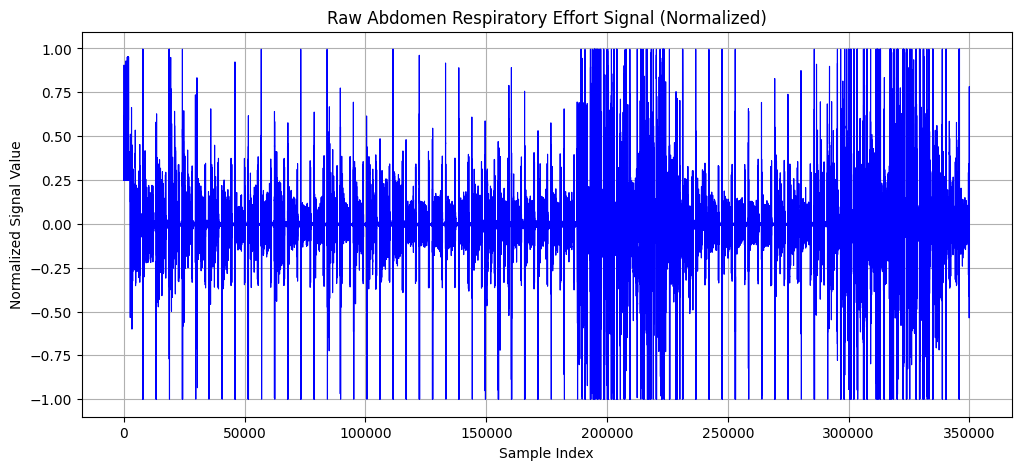

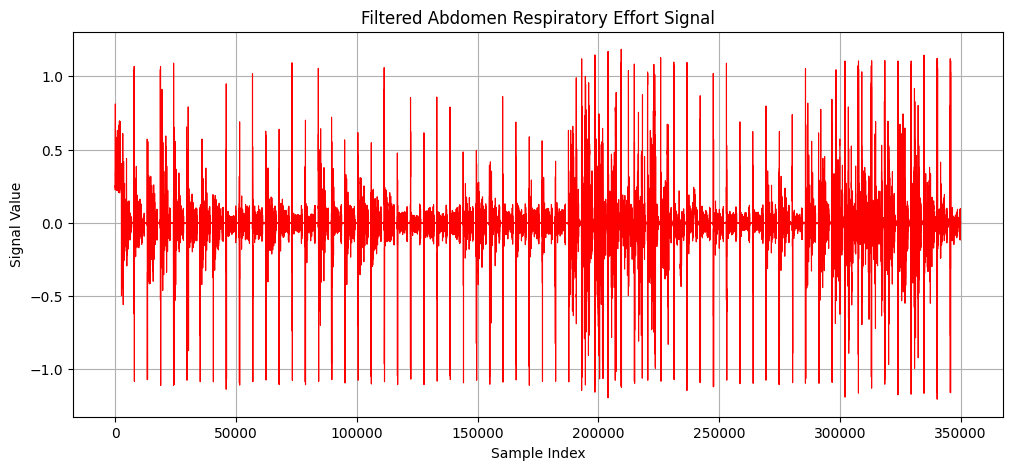

In [14]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Function to load .rec file
def load_rec_file(file_path):
    with open(file_path, "rb") as f:
        raw_data = np.fromfile(f, dtype=np.int16)  # Try int16 instead of float32
    return raw_data

# Function to apply a Butterworth low-pass filter
def butter_lowpass_filter(data, cutoff=5, fs=100, order=3):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = signal.filtfilt(b, a, data)
    return filtered_data

# Load and filter the .rec file
file_path = "../data/ISRUC_S3/RawData/RawData/1/1.rec"  # Change this to your actual file path
fs = 100  # Sampling frequency

raw_signal = load_rec_file(file_path)

if raw_signal.size == 0:
    print("Error: Loaded signal is empty!")
else:
    print(f"Loaded {raw_signal.shape[0]} samples.")

    # Debug print
    print(f"Min: {np.min(raw_signal)}, Max: {np.max(raw_signal)}")
    print(f"Mean: {np.mean(raw_signal)}, Std Dev: {np.std(raw_signal)}")

    # Normalize for better visualization
    raw_signal = raw_signal - np.mean(raw_signal)
    raw_signal = raw_signal / np.max(np.abs(raw_signal))

    # Plot raw signal
    plt.figure(figsize=(12, 5))
    plt.plot(raw_signal[:350000], color="blue", linewidth=0.8)  # First 1000 samples
    plt.title("Raw Abdomen Respiratory Effort Signal (Normalized)")
    plt.xlabel("Sample Index")
    plt.ylabel("Normalized Signal Value")
    plt.grid()
    plt.show()

    # Apply filter
    filtered_signal = butter_lowpass_filter(raw_signal, cutoff=5, fs=fs)

    # Plot filtered signal
    plt.figure(figsize=(12, 5))
    plt.plot(filtered_signal[:350000], color="red", linewidth=0.8)
    plt.title("Filtered Abdomen Respiratory Effort Signal")
    plt.xlabel("Sample Index")
    plt.ylabel("Signal Value")
    plt.grid()
    plt.show()


Loaded 77992060 samples.
Min: -32768, Max: 32767
Mean: 75.60505003970917, Std Dev: 3883.124116319937


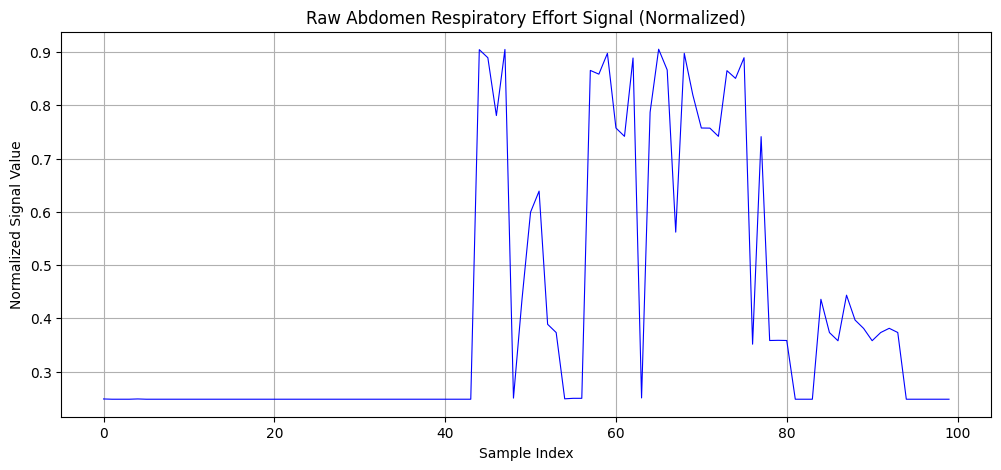

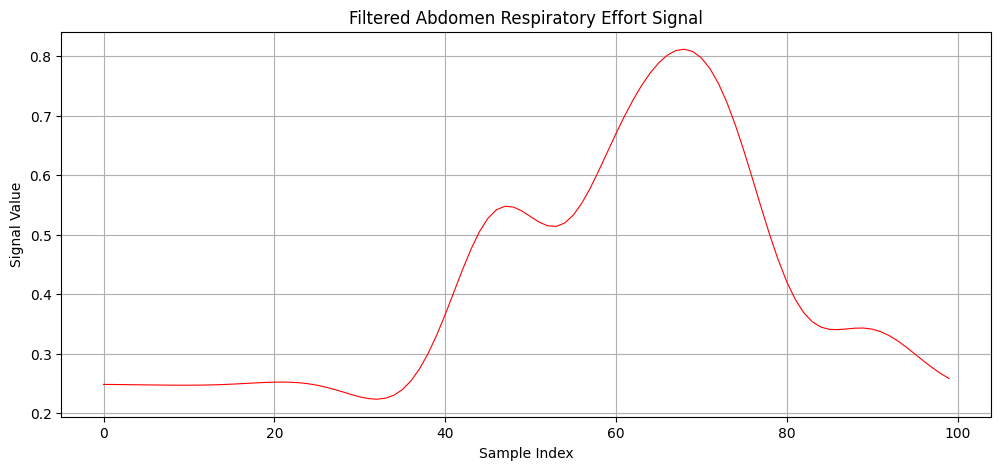

: 

In [ ]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Function to load .rec file
def load_rec_file(file_path):
    with open(file_path, "rb") as f:
        raw_data = np.fromfile(f, dtype=np.int16)  # Try int16 instead of float32
    return raw_data

# Function to apply a Butterworth low-pass filter
def butter_lowpass_filter(data, cutoff=5, fs=100, order=3):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = signal.filtfilt(b, a, data)
    return filtered_data

# Load and filter the .rec file
file_path = "../data/ISRUC_S3/RawData/RawData/1/1.rec"  # Change this to your actual file path
fs = 100  # Sampling frequency

raw_signal = load_rec_file(file_path)

if raw_signal.size == 0:
    print("Error: Loaded signal is empty!")
else:
    print(f"Loaded {raw_signal.shape[0]} samples.")

    # Debug print
    print(f"Min: {np.min(raw_signal)}, Max: {np.max(raw_signal)}")
    print(f"Mean: {np.mean(raw_signal)}, Std Dev: {np.std(raw_signal)}")

    # Normalize for better visualization
    raw_signal = raw_signal - np.mean(raw_signal)
    raw_signal = raw_signal / np.max(np.abs(raw_signal))

    # Plot raw signal
    plt.figure(figsize=(12, 5))
    plt.plot(raw_signal[:100], color="blue", linewidth=0.8)  # First 1000 samples
    plt.title("Raw Abdomen Respiratory Effort Signal (Normalized)")
    plt.xlabel("Sample Index")
    plt.ylabel("Normalized Signal Value")
    plt.grid()
    plt.show()

    # Apply filter
    filtered_signal = butter_lowpass_filter(raw_signal, cutoff=5, fs=fs)

    # Plot filtered signal
    plt.figure(figsize=(12, 5))
    plt.plot(filtered_signal[:100], color="red", linewidth=0.8)
    plt.title("Filtered Abdomen Respiratory Effort Signal")
    plt.xlabel("Sample Index")
    plt.ylabel("Signal Value")
    plt.grid()
    plt.show()


Loaded Subject 1 - 77992060 samples.
Loaded Subject 2 - 76929310 samples.
Loaded Subject 3 - 67364560 samples.
Loaded Subject 4 - 64912060 samples.
Loaded Subject 5 - 77174560 samples.
Loaded Subject 6 - 69735310 samples.
Loaded Subject 7 - 66547060 samples.
Loaded Subject 8 - 81752560 samples.
Loaded Subject 9 - 79218310 samples.
Loaded Subject 10 - 65075560 samples.


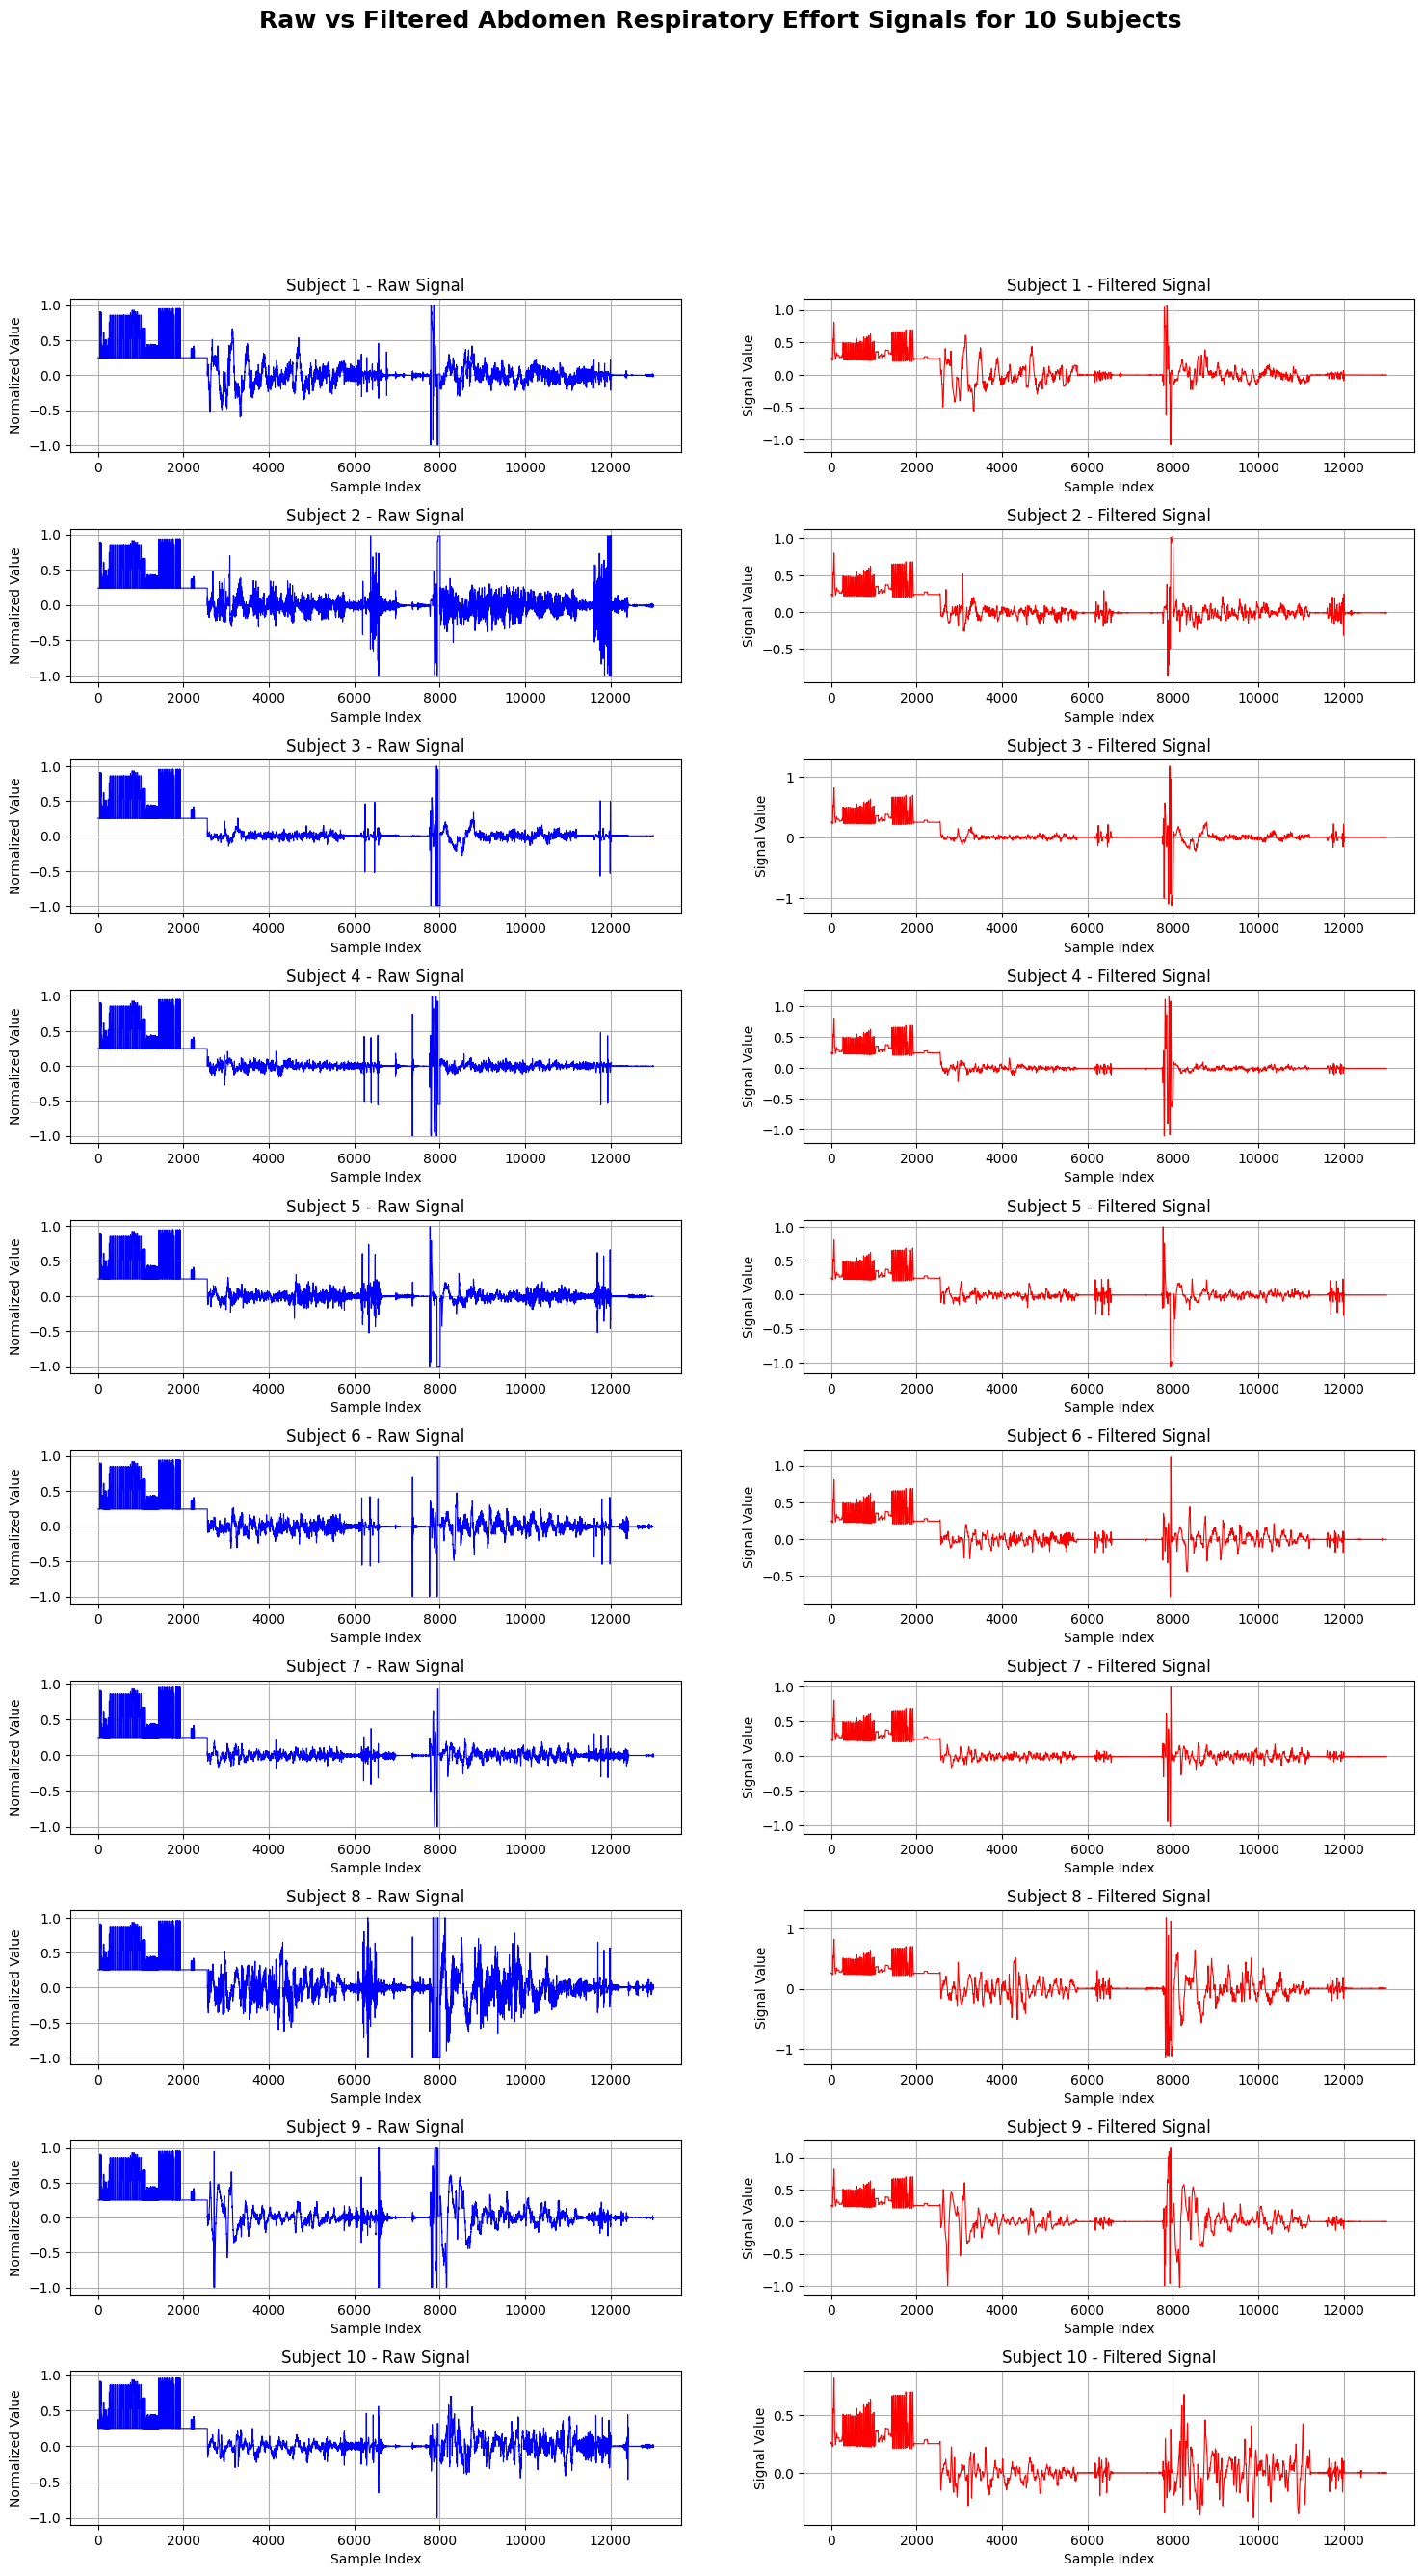

In [20]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Function to load .rec file
def load_rec_file(file_path):
    try:
        with open(file_path, "rb") as f:
            raw_data = np.fromfile(f, dtype=np.int16)  # Load as int16
        return raw_data
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None  # Return None if file can't be loaded

# Function to apply a Butterworth low-pass filter
def butter_lowpass_filter(data, cutoff=5, fs=100, order=3):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    return signal.filtfilt(b, a, data)

# Configuration
base_path = "../data/ISRUC_S3/RawData/RawData/"  # Base directory
num_subjects = 10  # Number of subjects
fs = 100  # Sampling frequency

# Create a figure with subplots for all subjects
fig, axes = plt.subplots(num_subjects, 2, figsize=(18, 30))  # 10 rows, 2 columns (raw + filtered)
plt.subplots_adjust(hspace=0.5)  # Adjust spacing between subplots

for i in range(1, num_subjects + 1):  
    file_path = f"{base_path}{i}/{i}.rec"  # Construct file path

    # Load data
    raw_signal = load_rec_file(file_path)

    if raw_signal is None or raw_signal.size == 0:
        print(f"Skipping Subject {i}: No valid data.")
        continue

    print(f"Loaded Subject {i} - {raw_signal.shape[0]} samples.")

    # Normalize for better visualization
    raw_signal = raw_signal - np.mean(raw_signal)
    raw_signal = raw_signal / np.max(np.abs(raw_signal))

    # Apply Butterworth filter
    filtered_signal = butter_lowpass_filter(raw_signal, cutoff=5, fs=fs)

    # Plot raw signal
    ax_raw = axes[i - 1, 0]
    ax_raw.plot(raw_signal[:13000], color="blue", linewidth=0.8)
    ax_raw.set_title(f"Subject {i} - Raw Signal", fontsize=12)
    ax_raw.set_xlabel("Sample Index")
    ax_raw.set_ylabel("Normalized Value")
    ax_raw.grid()

    # Plot filtered signal
    ax_filt = axes[i - 1, 1]
    ax_filt.plot(filtered_signal[:13000], color="red", linewidth=0.8)
    ax_filt.set_title(f"Subject {i} - Filtered Signal", fontsize=12)
    ax_filt.set_xlabel("Sample Index")
    ax_filt.set_ylabel("Signal Value")
    ax_filt.grid()

# Main title for all plots
fig.suptitle("Raw vs Filtered Abdomen Respiratory Effort Signals for 10 Subjects", fontsize=18, fontweight='bold')

plt.show()


In [14]:
from scipy.signal import find_peaks

# Detect peaks in the filtered signal
peaks, _ = find_peaks(filtered_signal, height=0.5, distance=50)  # Adjust height/distance

# Compute intervals between consecutive peaks (Breath-to-Breath Interval)
bb_intervals = np.diff(peaks)

In [15]:
print(peaks)

[      68      282      603 ... 77981516 77986547 77991997]


In [16]:
import neurokit2 as nk

# Extract peaks (breaths)
# peaks = nk.ecg_peaks(filtered_signal, sampling_rate=fs)["ECG_R_Peaks"]

# Compute breath-to-breath intervals
bb_intervals = np.diff(peaks) / fs

# Extract TDRRV features
tdrrv_features = {
    "Mean BB Interval": np.mean(bb_intervals),
    "Std BB Interval": np.std(bb_intervals),
    "Root Mean Square": np.sqrt(np.mean(bb_intervals ** 2)),
    "Mean Respiratory Rate": 60 / np.mean(bb_intervals),
    "Number of Breaths": len(bb_intervals),
}

print("TDRRV Features:", tdrrv_features)


TDRRV Features: {'Mean BB Interval': np.float64(42.85035382671282), 'Std BB Interval': np.float64(71.24779909045122), 'Root Mean Square': np.float64(83.14085456806289), 'Mean Respiratory Rate': np.float64(1.4002218101311483), 'Number of Breaths': 18201}


In [17]:
import pywt

# Compute Wavelet Transform
coeffs = pywt.wavedec(filtered_signal, 'sym7', level=7)  # 'sym7' is best wavelet for SA detection

# Compute energy of detail coefficients (DWTE features)
dwte_features = {f"Energy D{i+1}": np.sum(np.abs(coeffs[i])**2) for i in range(1, len(coeffs))}

print("DWTE Features:", dwte_features)


DWTE Features: {'Energy D2': np.float64(197009.99418554537), 'Energy D3': np.float64(279941.59959124355), 'Energy D4': np.float64(173465.89514096596), 'Energy D5': np.float64(41974.77961044809), 'Energy D6': np.float64(1828.9215722717422), 'Energy D7': np.float64(3.1784351132000936), 'Energy D8': np.float64(0.0008666599698564072)}


In [18]:
# Function to compute Shannon Entropy
def shannon_entropy(signal):
    prob_dist = np.histogram(signal, bins=100, density=True)[0]
    prob_dist = prob_dist[prob_dist > 0]  # Remove zero values
    return -np.sum(prob_dist * np.log2(prob_dist))

# Compute Shannon Entropy
sent_feature = shannon_entropy(filtered_signal)
print("Shannon Entropy (SEnt):", sent_feature)


Shannon Entropy (SEnt): -100.80608511275811


In [20]:
# print("Features DataFrame Shape:", features_df.shape)
# print(features_df.head())


In [21]:
# if features_df.shape[0] > 1:
#     scaler = StandardScaler()
#     scaled_features = scaler.fit_transform(features_df)

#     pca = PCA(n_components=0.95)  # Retain 95% variance
#     pca_features = pca.fit_transform(scaled_features)

#     print("PCA Features Shape:", pca_features.shape)
# else:
#     print("Not enough data for PCA. Need more than one sample.")


In [22]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Combine features into DataFrame
features_df = pd.DataFrame([{**tdrrv_features, **dwte_features, "Shannon Entropy": sent_feature}])

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
pca_features = pca.fit_transform(scaled_features)

print("PCA Features Shape:", pca_features.shape)


PCA Features Shape: (1, 1)


c:\Users\Victus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Load dataset (Assume we have labels: 1 = Normal, 2 = OSA, 3 = CSA)
X = pca_features  # Feature matrix
y = np.array([1])  # Replace with actual labels

print("x",X)
print("y",y)

# Apply SMOTE to balance classes
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train SVM Model
svm_model = SVC(kernel="rbf", probability=True)
svm_model.fit(X_train, y_train)

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=50)
rf_model.fit(X_train, y_train)

# Train Improved Random Forest Model (IRF)
irf_model = BalancedRandomForestClassifier(n_estimators=50)
irf_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_irf = irf_model.predict(X_test)

# Print Classification Reports
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\nImproved RF Classification Report:\n", classification_report(y_test, y_pred_irf))


x [[0.]]
y [1 2 3 5]


ValueError: Found input variables with inconsistent numbers of samples: [1, 4]

In [24]:
print("Unique labels in y:", np.unique(y))


Unique labels in y: [1]


In [31]:
import numpy as np
from imblearn.over_sampling import SMOTE

# Load class labels from text file
y = np.loadtxt("../data/ISRUC_S3/RawData/RawData/1/1_1.txt", dtype=int)

# Ensure X and y have the same length
if len(X) != len(y):
    raise ValueError(f"Mismatch: X has {len(X)} samples, but y has {len(y)} labels.")

# Check label distribution
unique_labels, label_counts = np.unique(y, return_counts=True)
print("Class Distribution Before SMOTE:", dict(zip(unique_labels, label_counts)))

# Apply SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Class Distribution After SMOTE:", np.unique(y_resampled, return_counts=True))


ValueError: Mismatch: X has 1 samples, but y has 954 labels.

NEW way unlock la

In [21]:
import os
import numpy as np
import mne
import shutil
import pywt
import scipy.signal as signal
import matplotlib.pyplot as plt
from scipy.stats import entropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM

In [22]:
def load_rec_file(file_path):
    """Try reading the .rec file using MNE. If that fails, try raw binary reading."""
    try:
        print(f"Trying to read {file_path} as EDF using MNE...")
        raw = mne.io.read_raw_edf(file_path, preload=True)
        print("Successfully read as EDF.")
        return raw.get_data(), raw.info["sfreq"]
    except Exception as e:
        print(f"Failed to read as EDF: {e}")

    # Try renaming to .edf and reading again
    edf_path = file_path.replace(".rec", ".edf")
    shutil.copy(file_path, edf_path)

    try:
        print(f"Trying to read {edf_path} after renaming...")
        raw = mne.io.read_raw_edf(edf_path, preload=True)
        print("Successfully read after renaming.")
        return raw.get_data(), raw.info["sfreq"]
    except Exception as e:
        print(f"Failed after renaming: {e}")

    # Read as raw binary (assuming 16-bit integers)
    print("Trying to read as raw binary data...")
    try:
        data = np.fromfile(file_path, dtype=np.int16)
        sampling_rate = 100  # Assume 100 Hz if unknown
        print("Successfully read as raw binary.")
        return data, sampling_rate
    except Exception as e:
        print(f"Failed to read raw binary: {e}")
        return None, None

In [23]:
file_path = "../data/ISRUC_S3/RawData/RawData/1/1.rec"  # Change this to your actual file path
signal_data, fs = load_rec_file(file_path)
print(f"Loaded signal with shape: {signal_data.shape}, Sampling Rate: {fs} Hz")

Trying to read ../data/ISRUC_S3/RawData/RawData/1/1.rec as EDF using MNE...
Failed to read as EDF: Only EDF files are supported, got rec.
Trying to read ../data/ISRUC_S3/RawData/RawData/1/1.edf after renaming...
Extracting EDF parameters from d:\Python\Major_Project\data\ISRUC_S3\RawData\RawData\1\1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 5723999  =      0.000 ... 28619.995 secs...
Successfully read after renaming.
Loaded signal with shape: (19, 5724000), Sampling Rate: 200.0 Hz


In [24]:
print(signal_data)

[[ 1.02998398e-08  1.05668727e-07  4.92484932e-07 ...  7.52651255e-07
   6.21423667e-07  6.09979400e-07]
 [ 7.24803540e-09 -1.52208743e-07 -1.04409857e-06 ... -7.82406348e-07
  -6.32867933e-07 -3.24635691e-07]
 [ 5.72213321e-09 -1.23216602e-07 -9.04478523e-07 ... -9.73907073e-07
  -1.13946746e-06 -1.15777829e-06]
 ...
 [ 1.32753491e-08  1.12166952e-05  1.98479814e-05 ... -3.31298303e-05
  -5.93579145e-05 -8.24907874e-05]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  9.84695201e+01
   9.84695201e+01  9.84695201e+01]
 [ 1.01860075e+02  1.01860075e+02  1.01860075e+02 ...  1.01860075e+02
   1.01860075e+02  1.01860075e+02]]


C:\Users\Victus\AppData\Local\Temp\ipykernel_17996\3584825823.py:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


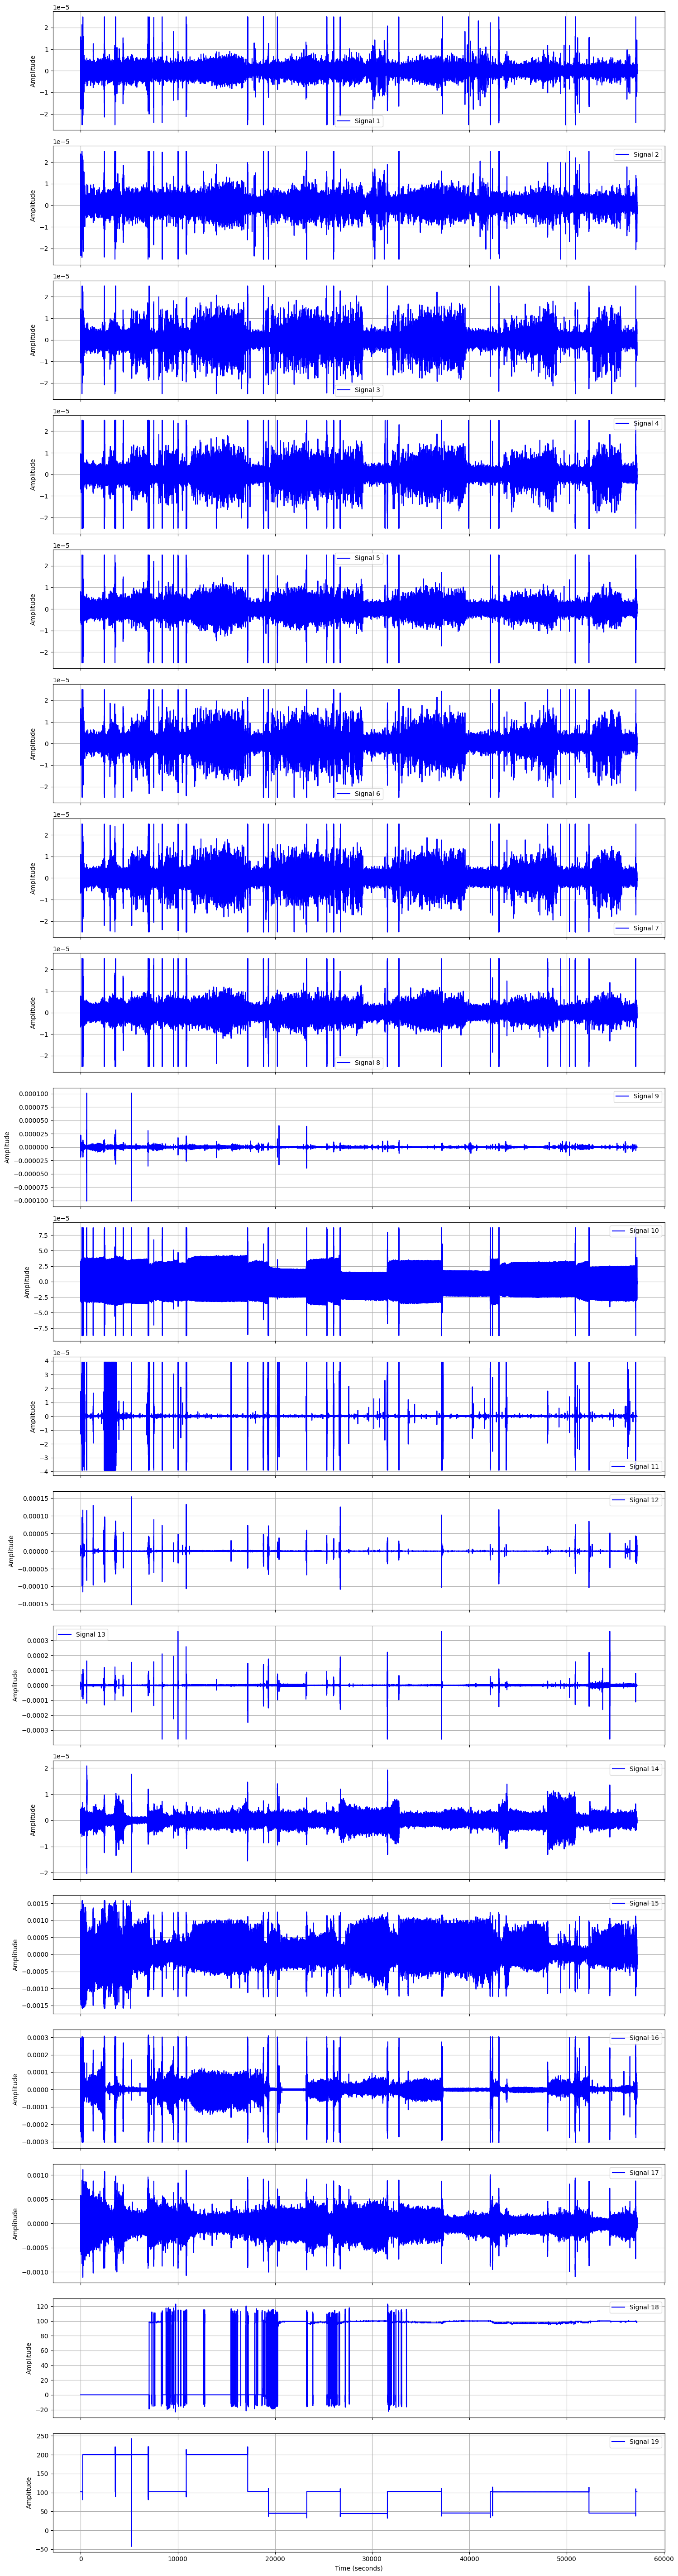

In [27]:
fig, axes = plt.subplots(num_signals, 1, figsize=(15, 3 * num_signals), sharex=True)

for i in range(num_signals):
    axes[i].plot(time_axis, signal_data[i, :], label=f"Signal {i+1}", color="blue")
    axes[i].set_ylabel("Amplitude")
    axes[i].grid()
    axes[i].legend()

axes[-1].set_xlabel("Time (seconds)")
# plt.suptitle("Individual Signal Plots")
plt.tight_layout()
plt.show()


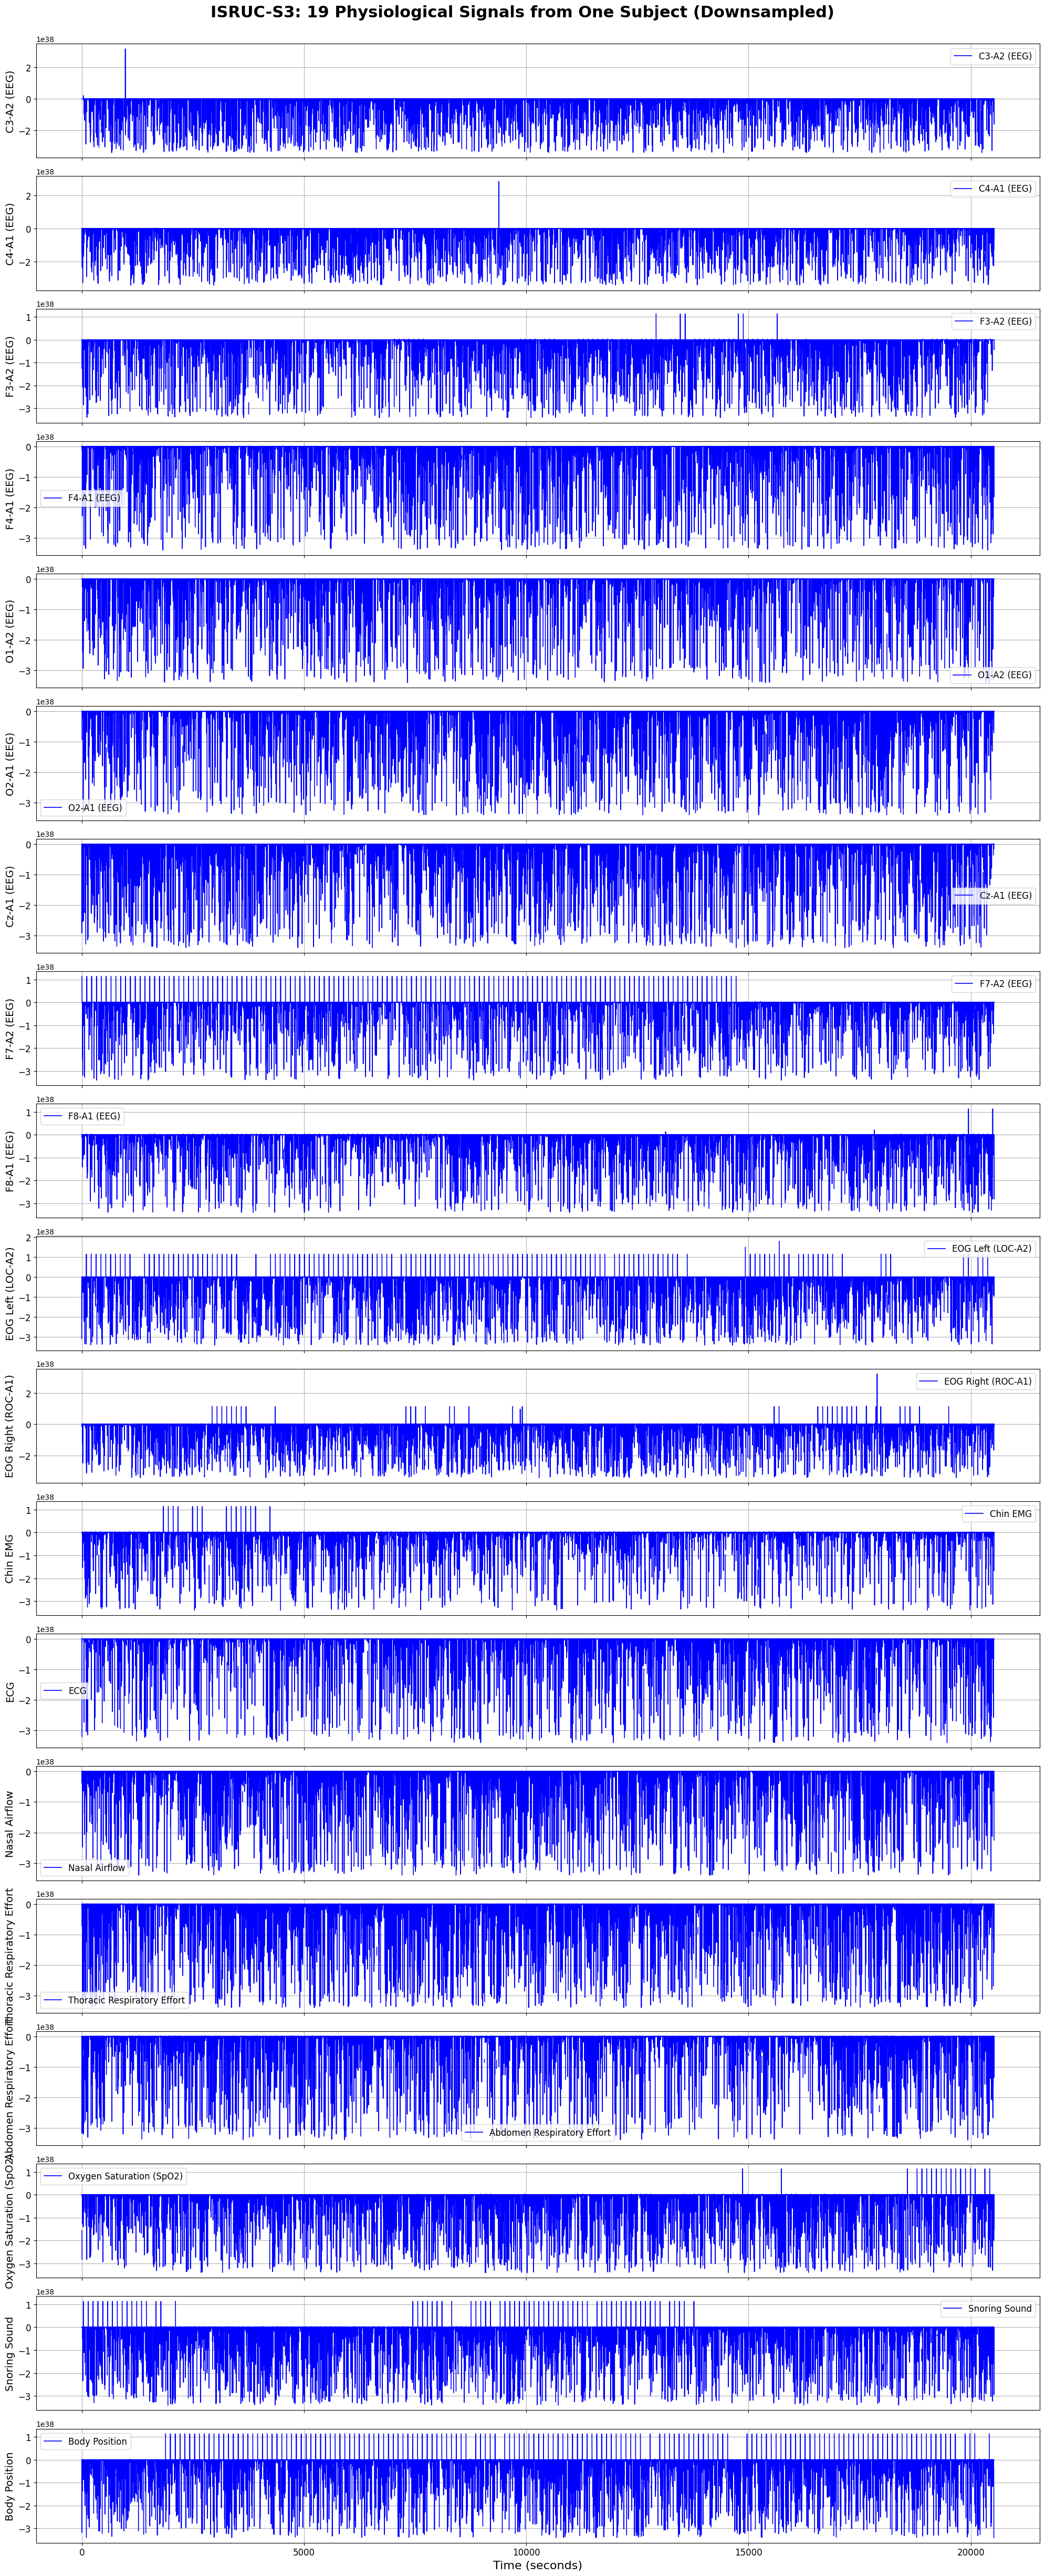

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# List of 19 signal labels
signal_labels = [
    "C3-A2 (EEG)", "C4-A1 (EEG)", "F3-A2 (EEG)", "F4-A1 (EEG)", "O1-A2 (EEG)", "O2-A1 (EEG)", "Cz-A1 (EEG)", 
    "F7-A2 (EEG)", "F8-A1 (EEG)", "EOG Left (LOC-A2)", "EOG Right (ROC-A1)", "Chin EMG", "ECG", "Nasal Airflow", 
    "Thoracic Respiratory Effort", "Abdomen Respiratory Effort", "Oxygen Saturation (SpO2)", "Snoring Sound", "Body Position"
]

# Load the .rec file
file_path = "../data/ISRUC_S3/RawData/RawData/1/1.rec"

with open(file_path, "rb") as f:
    raw_data = np.fromfile(f, dtype=np.float32)  # Use int16 if needed

# Reshape into (19 signals, num_samples)
num_channels = 19
num_samples = raw_data.shape[0] // num_channels
signal_data = raw_data[:num_samples * num_channels].reshape(num_channels, num_samples)

# 📌 Reduce Data (Downsampling) - Only take every 10th point
downsample_factor = 100  # Adjust this to show more/less data
signal_data = signal_data[:, ::downsample_factor]  # Downsampled signals

fs = 100  # Original Sampling frequency
fs_downsampled = fs / downsample_factor  # New sampling rate after downsampling
num_samples_downsampled = signal_data.shape[1]  # New number of samples
time_axis = np.arange(num_samples_downsampled) / fs_downsampled  # Adjusted time axis

# 📌 Increase Figure Size for Better Visibility
fig, axes = plt.subplots(num_channels, 1, figsize=(20, 50), sharex=True)

for i in range(num_channels):
    axes[i].plot(time_axis, signal_data[i, :], label=signal_labels[i], color="blue", linewidth=1.2)
    axes[i].set_ylabel(signal_labels[i], fontsize=14)
    axes[i].tick_params(axis='both', labelsize=12)
    axes[i].legend(fontsize=12)
    axes[i].grid()

axes[-1].set_xlabel("Time (seconds)", fontsize=16)

# 📌 Make Title Bigger and Bold
fig.suptitle("ISRUC-S3: 19 Physiological Signals from One Subject (Downsampled)", fontsize=22, fontweight="bold")

# 📌 Adjust Spacing Between Subplots
plt.subplots_adjust(hspace=0.4)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


C:\Users\Victus\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


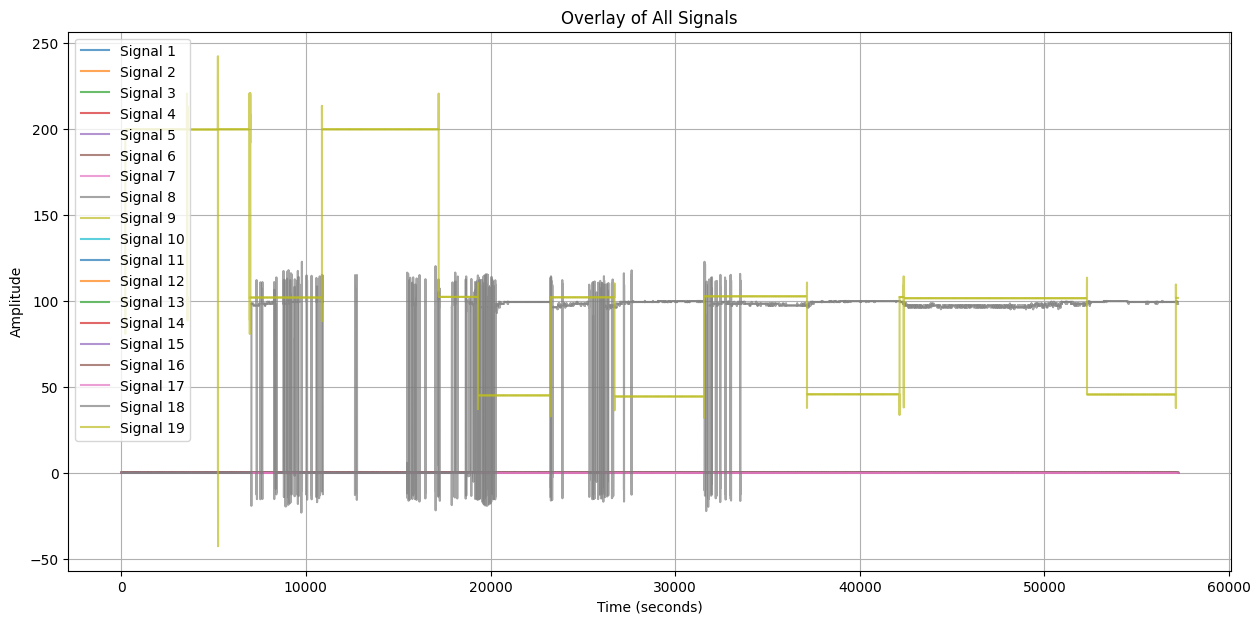

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming signal_data is already loaded as a NumPy array
num_signals, num_samples = signal_data.shape

# Create a time axis
fs = 100  # Adjust sampling frequency as needed
time_axis = np.arange(num_samples) / fs  

plt.figure(figsize=(15, 7))

# Plot each signal (row) on the same graph
for i in range(num_signals):
    plt.plot(time_axis, signal_data[i, :], label=f"Signal {i+1}", alpha=0.7)

plt.title("Overlay of All Signals")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt


In [ ]:
# import scipy.signal as signal
# import matplotlib.pyplot as plt

# def low_pass_filter(signal_data, fs, cutoff=2.0, order=4):
#     """Apply a low-pass filter to the signal."""
#     if len(signal_data) == 0:
#         raise ValueError("Signal data is empty.")

#     if fs <= 0:
#         raise ValueError("Sampling frequency must be positive.")

#     nyquist = 0.5 * fs
#     if cutoff >= nyquist:
#         raise ValueError(f"Cutoff frequency must be less than Nyquist frequency ({nyquist} Hz).")

#     normal_cutoff = cutoff / nyquist
#     b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
#     return signal.filtfilt(b, a, signal_data)

# # Ensure `fs` is defined before calling the function
# fs = 100  # Adjust if needed

# # Apply the filter using your existing `signal_data`
# filtered_signal = low_pass_filter(signal_data, fs)

# # Plot the results
# plt.figure(figsize=(10, 4))
# plt.plot(signal_data, label="Original Signal", linestyle="dotted", alpha=0.7)
# plt.plot(filtered_signal, label="Filtered Signal", linewidth=2)
# plt.legend()
# plt.title("Low-Pass Filtered Signal")
# plt.xlabel("Sample Index")
# plt.ylabel("Amplitude")
# plt.show()


In [ ]:
signal_data = signal_data[:10000]

In [ ]:
import scipy.signal as signal
import matplotlib.pyplot as plt

def low_pass_filter(signal_data, fs, cutoff=2.0, order=4):
    """Apply a low-pass filter to the signal."""
    if len(signal_data) == 0:
        raise ValueError("Signal data is empty.")

    if fs <= 0:
        raise ValueError("Sampling frequency must be positive.")

    nyquist = 0.5 * fs
    if cutoff >= nyquist:
        raise ValueError(f"Cutoff frequency must be less than Nyquist frequency ({nyquist} Hz).")

    normal_cutoff = cutoff / nyquist
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    return signal.filtfilt(b, a, signal_data)

# Ensure `fs` is defined before calling the function
fs = 100  # Adjust as needed

# Process only the first 10,000 samples
signal_subset = signal_data[:10000]  # Select only the first 10,000 samples

# Apply the filter to the selected samples
filtered_signal = low_pass_filter(signal_subset, fs)

# Plot the results
# plt.figure(figsize=(10, 4))
# plt.plot(signal_subset, label="Original Signal", linestyle="dotted", alpha=0.7)
# plt.plot(filtered_signal, label="Filtered Signal", linewidth=2)
# plt.legend()
# plt.title("Low-Pass Filtered Signal (First 10,000 Samples)")
# plt.xlabel("Sample Index")
# plt.ylabel("Amplitude")
# plt.show()


In [ ]:
# filtered_signal = low_pass_filter(signal_data, fs)
# plt.plot(filtered_signal[:500])  # Plot first 500 samples
# plt.title("Filtered Signal")
# plt.show()

In [ ]:
# from scipy.signal import find_peaks

# # Detect peaks in the filtered signal
# peaks, _ = find_peaks(filtered_signal, height=0.5, distance=50)  # Adjust height/distance

# # Compute intervals between consecutive peaks (Breath-to-Breath Interval)
# bb_intervals = np.diff(peaks)

Signal Data Shape: (10000,)


c:\Users\Victus\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1345: RuntimeWarning: invalid value encountered in cast
  return np.asarray(x, float)


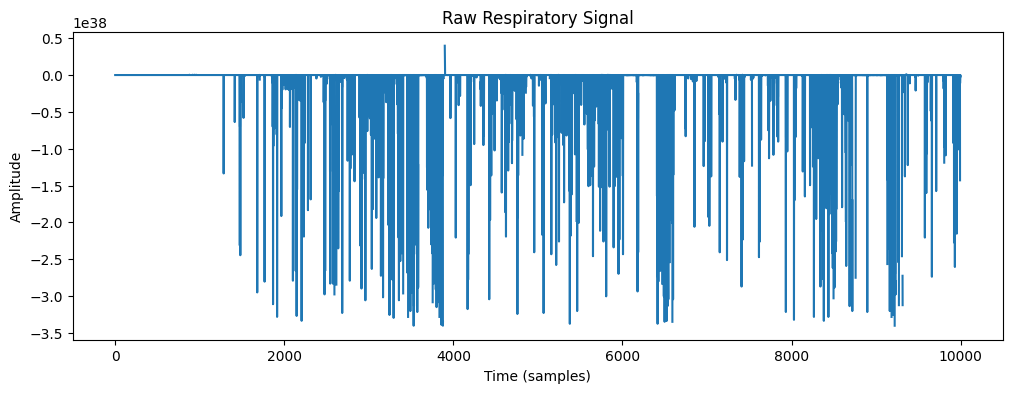

In [ ]:
import numpy as np
import neurokit2 as nk
import matplotlib.pyplot as plt
import scipy.signal as signal
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
shat thay ja naga

# Load .rec file (respiratory signal)
file_path = "../data/ISRUC_S3/RawData/RawData/1/1.rec"
fs = 100  # Sampling frequency (assumed, adjust if needed)

with open(file_path, "rb") as f:
    signal_data = np.fromfile(f, dtype=np.float32)

# Select first 10,000 samples
signal_data = signal_data[:10000]

# Check signal shape
print(f"Signal Data Shape: {signal_data.shape}")

# Plot raw signal
plt.figure(figsize=(12, 4))
plt.plot(signal_data[:10000])  # First 500 samples for visualization
plt.title("Raw Respiratory Signal")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.show()


In [39]:
import numpy as np

# Load labels
txt_file_path = "../data/ISRUC_S3/RawData/RawData/1/1_1.txt"
with open(txt_file_path, "r") as f:
    labels = np.array([int(line.strip()) for line in f])  # Keep variable name 'labels'

# Print original labels
print(f"Original Unique Labels: {np.unique(labels)}")

# Define mapping: Convert 3 → 2 (CSA), and 5 → 1 (OSA)
label_mapping = {3: 2, 5: 1}

# Apply mapping (Keep 0, 1, 2 unchanged)
labels = np.array([label_mapping.get(label, label) for label in labels])  # Update in place

# Print cleaned labels
print(f"Mapped Unique Labels: {np.unique(labels)}")
print(f"Labels Shape: {labels.shape}")


Original Unique Labels: [0 1 2 3 5]
Mapped Unique Labels: [0 1 2]
Labels Shape: (954,)


In [42]:
# def low_pass_filter(signal_data, fs, cutoff=2.0, order=4):
#     """Apply a low-pass filter to remove high-frequency noise."""
#     nyquist = 0.5 * fs
#     normal_cutoff = cutoff / nyquist
#     b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
#     return signal.filtfilt(b, a, signal_data)

# # Filter the signal
# filtered_signal = low_pass_filter(signal_data, fs)
# print(filtered_signal)
# # Plot filtered signal
# plt.figure(figsize=(12, 4))
# plt.plot(filtered_signal[:500])
# plt.title("Filtered Respiratory Signal")
# plt.xlabel("Time (samples)")
# plt.ylabel("Amplitude")
# plt.show()


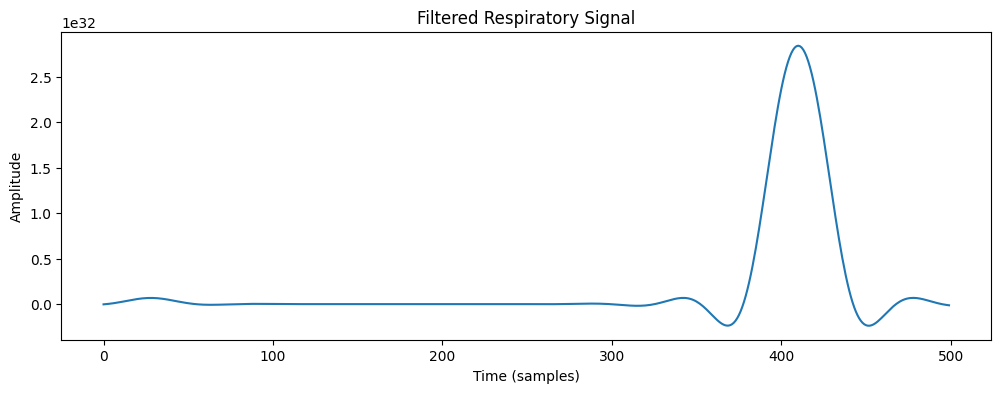

In [41]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Check for NaN or Inf values in signal_data
if np.any(np.isnan(signal_data)) or np.any(np.isinf(signal_data)):
    print("Warning: NaN or Inf detected in signal_data. Fixing...")
    signal_data = np.nan_to_num(signal_data)  # Replace NaN/Infs with zero

def low_pass_filter(signal_data, fs, cutoff=2.0, order=4):
    """Apply a low-pass filter to remove high-frequency noise."""
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    return signal.filtfilt(b, a, signal_data)

# Filter the signal
filtered_signal = low_pass_filter(signal_data, fs)

# Check if filtering resulted in NaN/Inf
if np.any(np.isnan(filtered_signal)) or np.any(np.isinf(filtered_signal)):
    print("Warning: NaN/Inf detected after filtering! Fixing...")
    filtered_signal = np.nan_to_num(filtered_signal)

# Plot filtered signal
plt.figure(figsize=(12, 4))
plt.plot(filtered_signal[:500])
plt.title("Filtered Respiratory Signal")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.show()


In [43]:
# Detect BB Peaks using NeuroKit2
bb_results = nk.rsp_peaks(filtered_signal, sampling_rate=fs)
peaks = bb_results["RSP_Peaks"]

# Plot detected peaks
plt.figure(figsize=(12, 4))
plt.plot(filtered_signal, label="Filtered Signal")
plt.scatter(peaks, filtered_signal[peaks], color="red", label="BB Peaks")
plt.legend()
plt.title("BB Peak Detection")
plt.show()

# Print detected peaks count
print(f"Total BB Peaks Detected: {len(peaks)}")


TypeError: tuple indices must be integers or slices, not str